# Use case: Weather analysis.

**Problem Statement**
To predict weather conditions using machine learning.

**Possible challenges**
- To identify the areas which are exposed to rainfall.
- Considering the temperature and pressure as parameters, K-means algorithm will identify the regions which are expecting heavy rainfall.

We are going to use a dataset with 3000 entries. We assume K=3 in this case. We will start by importing the dataset.


In [3]:
# importing libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [7]:
# load the data
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 3)


,rownames,Temperature Difference,Pressure Difference
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


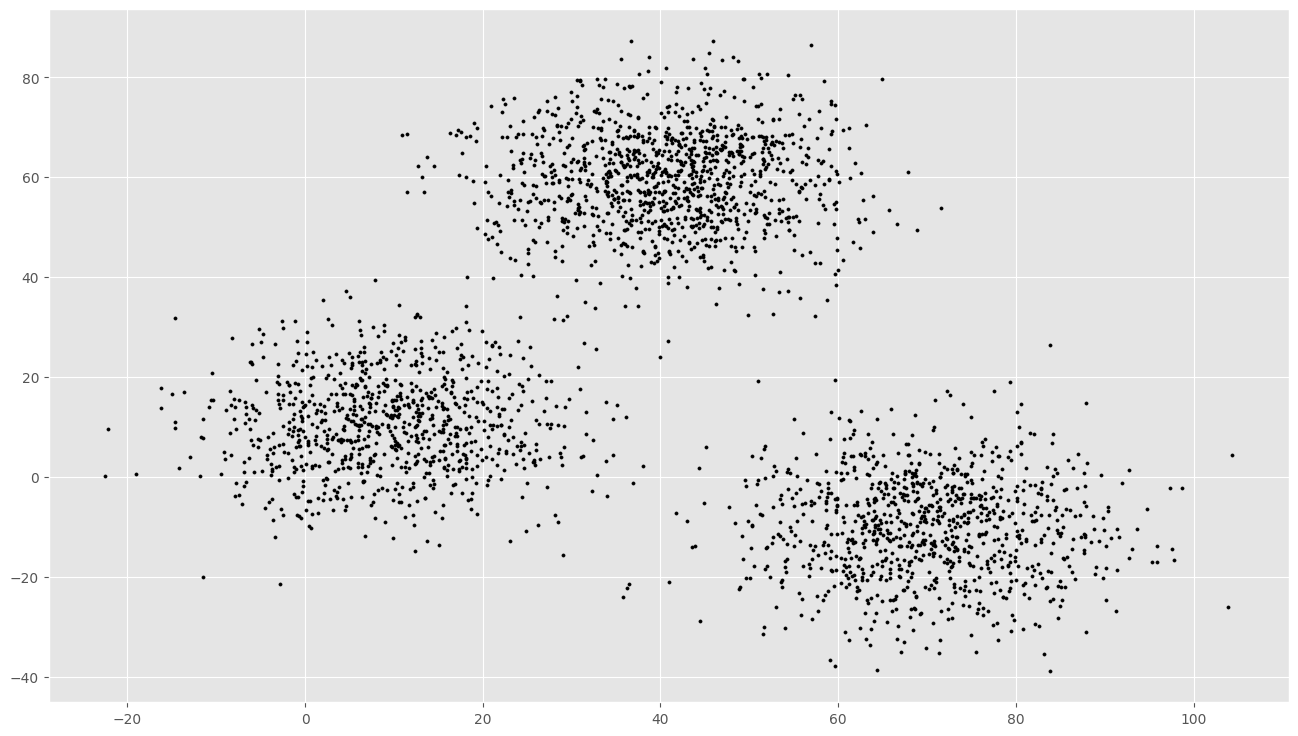

In [22]:
# getting the values and plotting it
f1 = data['Temperature Difference'].values
f2 = data['Pressure Difference'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=5)
plt.show()

In [ ]:
# now that we have grouped into 3 clusters. therefore, we'll use 3.

In [23]:
# euclidian distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [51]:
# number of clusters
k = 3

# x coordinates of random centroids
C_x = np.random.randint(0, np.max(X) - 20, size=k)

# y coordinates of random centroids
C_y = np.random.randint(0, np.max(X) - 20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[35. 34.]
 [11.  6.]
 [60. 17.]]


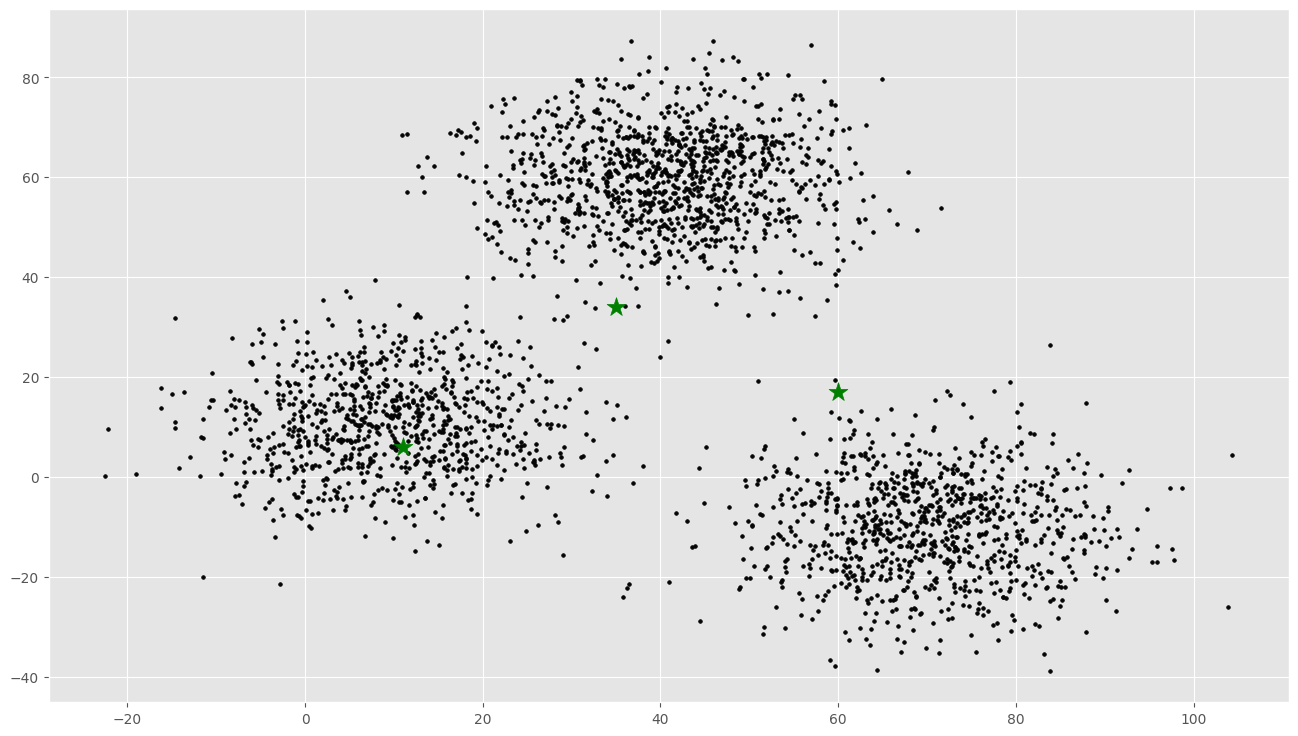

In [52]:
# plot a scatter plot with the centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

In [69]:
# to store the value of centroids when it updates.
C_old = np.zeros(C.shape)

# cluster lables (0, 1, 2)
clusters = np.zeros(len(X))

# error func. distance between new centroids and old centroids
error = dist(C, C_old, None)

run_count = 1

# loop will run till the error becomes 0
while error != 0:
    # assigning each value to its clossest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    run_count += 1
print("run count: %d" % run_count)

KeyboardInterrupt: 

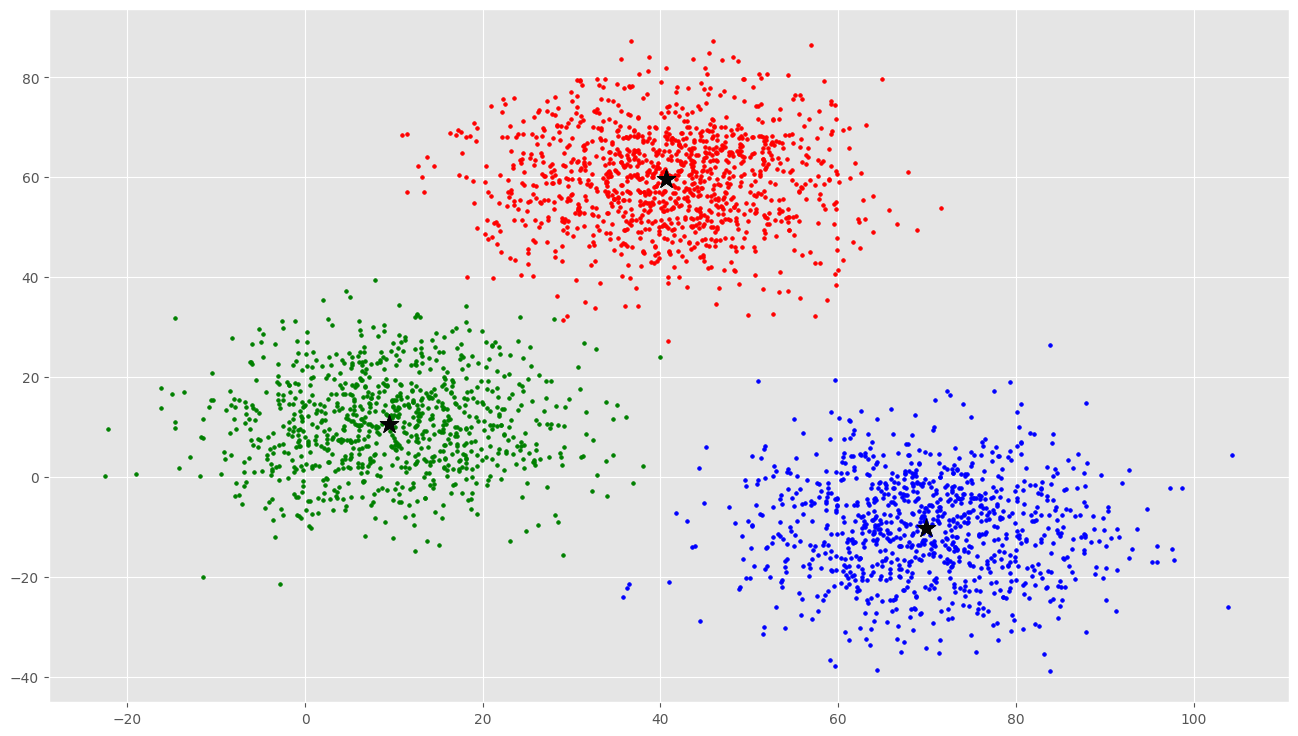

In [72]:
# storing the old centroid values
C_old = deepcopy(C)
# finding the new centroids by taking the average value
for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
                
